In [98]:
%matplotlib inline

import numpy as np
import utils
import matplotlib.pyplot as plt
import sk_optimization as sk
import skopt

import gpfunctions as gp

In [49]:
sample_x = np.load('./skopt-result/1d-rbf-samples_x.npy')
sample_y = np.load('./skopt-result/1d-rbf-samples_y.npy')

In [50]:
sample_y.shape

(2000, 21)

In [54]:
means = np.mean(np.apply_along_axis(utils.min_up_to_k, 1, sample_y), axis=0)
var = np.var(np.apply_along_axis(utils.min_up_to_k, 1, sample_y), axis=0)

In [52]:
means.shape

(21,)

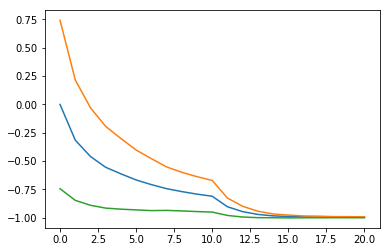

In [56]:
plt.plot(means)
plt.plot(means+2*var)
plt.plot(means-2*var)


In [30]:
sample_y.shape

(10, 21)

In [57]:
np.min(means)

-0.99710101597435663

In [59]:
sample_y = np.load('./skopt-result/1d-rbf-samples_y.npy')
means = np.mean(np.apply_along_axis(utils.min_up_to_k, 1, sample_y), axis=0)
print(means[-1])

-0.997101015974


In [60]:
sample_y = np.load('./skopt-result/3d-rbf-samples_y.npy')
means = np.mean(np.apply_along_axis(utils.min_up_to_k, 1, sample_y), axis=0)
print(means[-1])

-0.93622146309


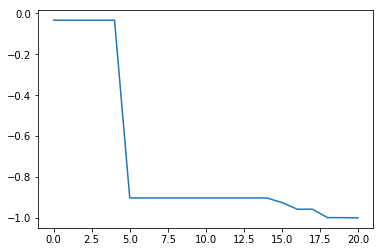

In [71]:
plt.plot(utils.min_up_to_k(sample_y[5,:]))

In [117]:
skopt_obj = sk.SKOptimizer()

In [135]:
X, A, minv, maxv = utils.loadData(2, 'testing', 'rbf')
NO_FUNCTIONS = 100
l = 2.0/6*np.sqrt(2)

In [136]:
X[:NO_FUNCTIONS,:,:].shape

(100, 6, 2)

In [137]:
N_RANDOM_STARTS = [3,5,10,15]

In [138]:
def average_min_found_values_across_rows(values):
    return np.mean(np.apply_along_axis(utils.min_up_to_k, 1, values), axis=0)

/Users/heytitle/projects/neural-network-project/python3-env/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/heytitle/projects/neural-network-project/python3-env/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/heytitle/projects/neural-network-project/python3-env/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/heytitle/projects/neural-network-project/python3-env/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/Users/heytitle/projects/neural-

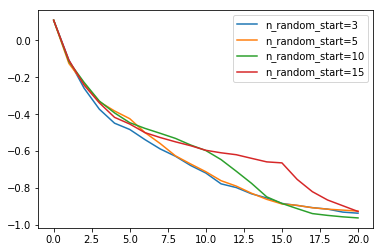

In [139]:
for nrd in N_RANDOM_STARTS:
    _, y = skopt_obj.get_samples_sk(X,A, minv, maxv, l, 2, 21, gp.normalized_gp_function, gp.kernel_function('rbf'), NO_FUNCTIONS, [-1,-1], nrd )
    plt.plot(average_min_found_values_across_rows(y), label="n_random_start=%d" % nrd)
plt.legend()

In [146]:
    X_test, A_test, min_test, max_test = utils.loadData(6, 'testing', 'rbf')


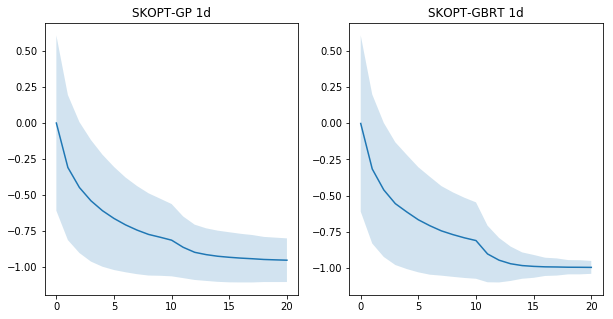

In [213]:
plt.figure(figsize=(10,5))
dim = 1
idx = -1
skopt_y = np.load('./skopt-result/%s/%dd-%s-samples_y.npy' % ( 'gbrt', dim, 'rbf'))
min_skopt_y = np.apply_along_axis(utils.min_up_to_k, 1, skopt_y)[:idx,:]

std_mean_y = np.std(min_skopt_y, axis=0)
mean_y = np.mean(min_skopt_y, axis=0)

plt.subplot(1,2,1)
plt.plot(mean_y)
plt.fill_between(range(0,21), mean_y  - std_mean_y, mean_y + std_mean_y, alpha=0.2)
plt.title('SKOPT-GP %dd'% dim)

skopt_y = np.load('./skopt-result/%s/%dd-%s-samples_y.npy' % ( 'gp', dim, 'rbf'))
min_skopt_y = np.apply_along_axis(utils.min_up_to_k, 1, skopt_y)[:idx,:]

std_mean_y = np.std(min_skopt_y, axis=0)
mean_y = np.mean(min_skopt_y, axis=0)

plt.subplot(1,2,2)
plt.plot(mean_y)
plt.fill_between(range(0,21), mean_y  - std_mean_y, mean_y + std_mean_y, alpha=0.2)
plt.title('SKOPT-GBRT %dd' % dim)

In [216]:
plt.figure(figsize=(10,5))
dim = 6
idx = -1
skopt_y = np.load('./skopt-result/%s/%dd-%s-samples_y.npy' % ( 'gp', dim, 'rbf'))
print(skopt_y.shape)
# min_skopt_y = np.apply_along_axis(utils.min_up_to_k, 1, skopt_y)[:idx,:]

# std_mean_y = np.std(min_skopt_y, axis=0)
# mean_y = np.mean(min_skopt_y, axis=0)

# plt.subplot(1,2,1)
# plt.plot(mean_y)
# plt.fill_between(range(0,21), mean_y  - std_mean_y, mean_y + std_mean_y, alpha=0.2)
# plt.title('SKOPT-GP 6d')

# skopt_y = np.load('./skopt-result/%s/%dd-%s-samples_y-100.npy' % ( 'gp', dim, 'rbf'))
# min_skopt_y = np.apply_along_axis(utils.min_up_to_k, 1, skopt_y)[:idx,:]

# std_mean_y = np.std(min_skopt_y, axis=0)
# mean_y = np.mean(min_skopt_y, axis=0)

# plt.subplot(1,2,2)
# plt.plot(mean_y)
# plt.fill_between(range(0,21), mean_y  - std_mean_y, mean_y + std_mean_y, alpha=0.2)
# plt.title('SKOPT-GBRT 6d')

(2000, 21)


In [217]:
import sk_optimization as sk

In [225]:
import sk_optimization as sk
sk.SKOptimizer().run(kernel='rbf', dim=2, no_testing_func=100, optimizer='basinhopping')

Optimizing for first 100 functions of 2-rbf testing data using basinhopping optimizer with 21 steps
Time:  2.903127908706665
Saving data with prefix basinhopping/2d-rbf


In [226]:
sk.SKOptimizer().run(kernel='rbf', dim=2, no_testing_func=100, optimizer='gp')

Optimizing for first 100 functions of 2-rbf testing data using gp optimizer with 21 steps


/Users/heytitle/projects/neural-network-project/python3-env/lib/python3.5/site-packages/skopt/optimizer/optimizer.py:195: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


KeyboardInterrupt: 

In [224]:
import imp
imp.reload(sk)

<module 'sk_optimization' from '/Users/heytitle/projects/neural-network-project/sk_optimization.py'>